In [2]:
#import the required libraries
#import tensorflow and tf.keras library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.8.0


In [4]:
#import and load the Fashion MNIST data
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [5]:
#store a class names
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [6]:
#explore the data
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

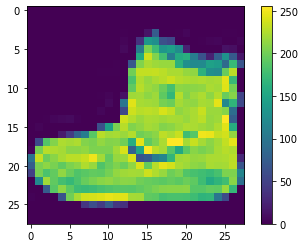

In [7]:
#preprocess the data
#set the pixel values in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#set the training set and test set
train_images=train_images/255.0
test_images=test_images/255.0

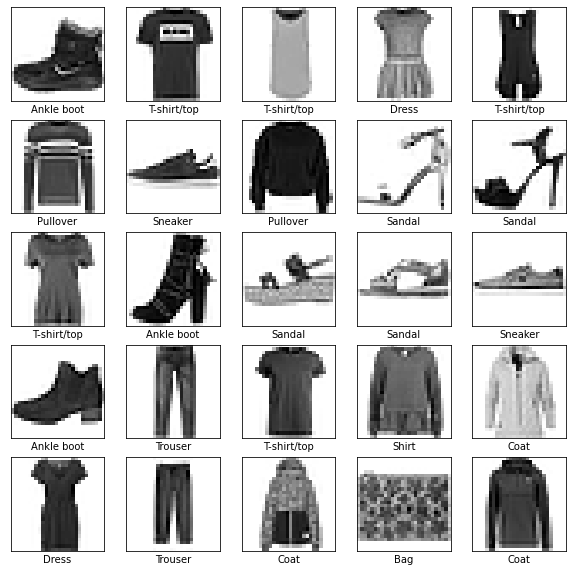

In [9]:
#display the first 25 images from the training set with theor class names
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
#Build the model
#set up the layers
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5008 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3370 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3136 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2826 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2572 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2503 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [13]:
#Evaluate the accuracy
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)

1875/1875 - 4s - loss: 0.2309 - accuracy: 0.9126 - 4s/epoch - 2ms/step


In [14]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9125999808311462


In [15]:
#Predictions
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_images)

In [16]:
#predict the 1st prediction
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

In [18]:
#Graph the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)


In [19]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

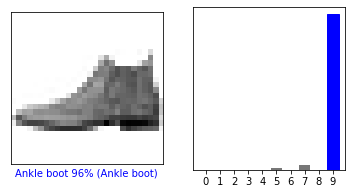

In [22]:
#verify the predictions
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

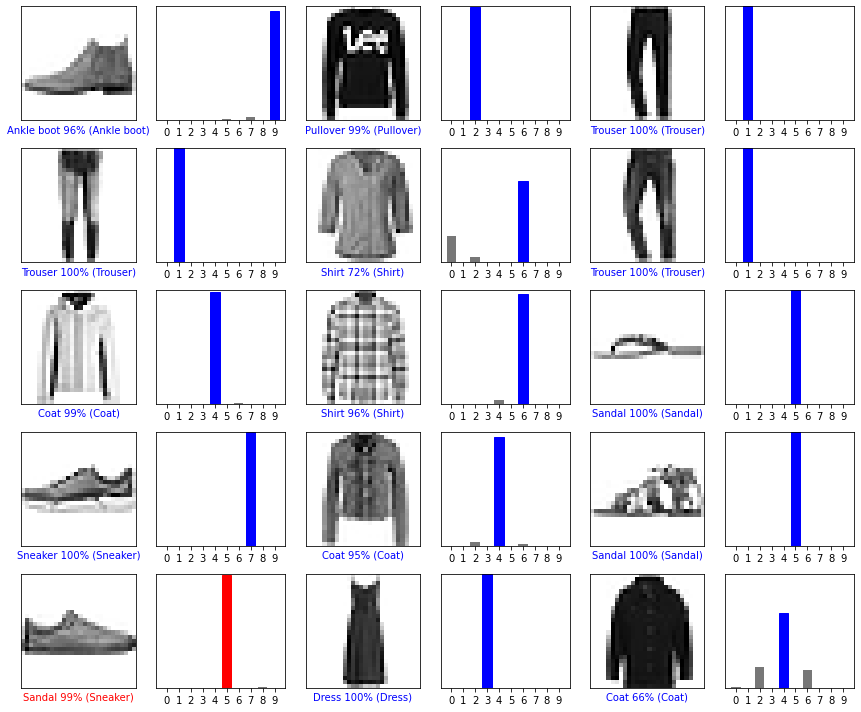

In [23]:
#plot the 1st X test images,their predicted labels,and the true labels
#color correct predictions in blue and incorrect predictions in red
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [24]:
#Use the trained model
#Grab an image from the test dataset
img=test_images[1]
print(img.shape)

(28, 28)


In [26]:
#Add the image to a batch where its the only member
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
#predict the correct label for the given image
predictions_single=probability_model.predict(img)
print(predictions_single)

[[1.8747803e-04 2.5458006e-12 9.9189550e-01 3.6099625e-13 7.4082664e-03
  1.7942950e-09 5.0874497e-04 3.2785590e-11 5.3996108e-10 1.4366302e-11]]


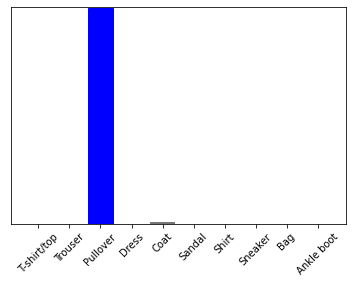

In [32]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

2